## Allen Brain Institute data access
I worked with the Visual Coding - Neuropixels dataset from Allen Brain --> https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html

In [3]:
import os

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from pathlib import Path
import json
from IPython.display import display
from PIL import Image

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys.ecephys_session import (
    EcephysSession,
    removed_unused_stimulus_presentation_columns
)
from allensdk.brain_observatory.ecephys.visualization import plot_mean_waveforms, plot_spike_counts, raster_plot
from allensdk.brain_observatory.visualization import plot_running_speed
from allensdk.brain_observatory.ecephys.lfp_subsampling.subsampling import select_channels, subsample_lfp, subsample_timestamps

# tell pandas to show all columns when display df
pd.set_option("display.max_columns", None)

/var/folders/sv/v5j1hg9x7jj59k3f5qg1p6zc0000gn/T/ipykernel_11869/3647653234.py:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [5]:
output_dir = "/Users/hannahghaffari/Documents/Mehta_lab/ecephys_cache_dir"

manifest_path = os.path.join(output_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

sessions = cache.get_session_table()
print(sessions)

                   published_at  specimen_id             session_type  \
id                                                                      
715093703  2019-10-03T00:00:00Z    699733581    brain_observatory_1.1   
719161530  2019-10-03T00:00:00Z    703279284    brain_observatory_1.1   
721123822  2019-10-03T00:00:00Z    707296982    brain_observatory_1.1   
732592105  2019-10-03T00:00:00Z    717038288    brain_observatory_1.1   
737581020  2019-10-03T00:00:00Z    718643567    brain_observatory_1.1   
739448407  2019-10-03T00:00:00Z    716813543    brain_observatory_1.1   
742951821  2019-10-03T00:00:00Z    723627604    brain_observatory_1.1   
743475441  2019-10-03T00:00:00Z    722882755    brain_observatory_1.1   
744228101  2019-10-03T00:00:00Z    719817805    brain_observatory_1.1   
746083955  2019-10-03T00:00:00Z    726170935    brain_observatory_1.1   
750332458  2019-10-03T00:00:00Z    726141251    brain_observatory_1.1   
750749662  2019-10-03T00:00:00Z    726162197    bra

In [7]:
# download data for session
session = cache.get_session_data(sessions.index.values[9])
print(session.ecephys_session_id)

/Users/hannahghaffari/miniconda3/envs/allen_3.9/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Users/hannahghaffari/miniconda3/envs/allen_3.9/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


746083955


In [8]:
session_id = session.ecephys_session_id
print(session_id)
session.probes

746083955


,description,location,sampling_rate,lfp_sampling_rate,has_lfp_data
id,,,,,
760647905,probeA,See electrode locations,29999.971918,1249.998830,True
760647907,probeB,See electrode locations,29999.920462,1249.996686,True
760647909,probeC,See electrode locations,29999.998792,1249.999950,True
760647911,probeD,See electrode locations,29999.924941,1249.996873,True
760647913,probeE,See electrode locations,30000.043165,1250.001799,True
760647915,probeF,See electrode locations,30000.043165,1250.001799,True


In [9]:
# download spike_times data

print(dir(session))
spike_times = session.spike_times

spike_df = pd.DataFrame([
    {"unit_id": unit, "spike_time": t}
    for unit, times in spike_times.items()
    for t in times
])

spikes_outfile = f"/Users/hannahghaffari/Documents/Mehta_lab/ecephys_cache_dir/session_{session_id}/spike_times.csv"
spike_df.to_csv(spikes_outfile, index = False)

['DETAILED_STIMULUS_PARAMETERS', 'LazyProperty', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_build_inter_presentation_intervals', '_build_mean_waveforms', '_build_nwb1_waveforms', '_build_spike_times', '_build_stimulus_presentations', '_build_units_table', '_filter_invalid_times_by_tags', '_filter_owned_df', '_get_valid_time_points', '_mask_invalid_stimulus_presentations', '_metadata', '_remove_detailed_stimulus_parameters', '_rig_metadata', '_spike_times', '_stimulus_presentations', '_units', '_warn_invalid_spike_intervals', 'age_in_days', 'api', 'channel_structure_intervals', 'channels', 'conditionwise_spike_statistics', 'ecephys_session_id', 'from_nwb_path', 'full_genotype', 'get_curren

/Users/hannahghaffari/miniconda3/envs/allen_3.9/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Users/hannahghaffari/miniconda3/envs/allen_3.9/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Users/hannahghaffari/miniconda3/envs/allen_3.9/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Users/hannahghaffari/miniconda3/envs/allen_3.9/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: 

In [10]:
# more info spike_times

print(type(session.spike_times))
print(len(session.spike_times)) # total number of recorded units (neurons)
print(list(session.spike_times.keys())[:5])
print(list(session.spike_times.keys())[-5:])
print(list(session.spike_times.keys())[300])

<class 'dict'>
582
[951881498, 951881488, 951878927, 951880667, 951881060]
[951871054, 951872707, 951870167, 951870010, 951872973]
951888049


In [11]:
probes = cache.get_probes()

print('Fraction of probes with LFP: ' + str(np.around( np.sum(probes.has_lfp_data) / len(probes), 3) ) )
print('Sessions with missing LFP files: ' + str(list(probes[probes.has_lfp_data == False].ecephys_session_id.unique())))

Fraction of probes with LFP: 0.979
Sessions with missing LFP files: [763673393, 831882777, 839557629]


In [13]:
# get location info for each probe in this session 

{session.probes.loc[probe_id].description :
    list(session.channels[session.channels.probe_id == probe_id].ecephys_structure_acronym.unique())
    for probe_id in session.probes.index.values}

{'probeA': ['grey', 'VISpm', nan],
 'probeB': ['grey', nan, 'VISpm'],
 'probeC': [nan, 'grey', 'VISp'],
 'probeD': ['grey', 'VISl', nan],
 'probeE': ['VISal', nan, 'VPM', 'TH', 'LGd', 'CA3', 'CA2', 'CA1'],
 'probeF': [nan, 'VISrl', 'grey']}

In [14]:
session.channels.keys()

Index(['filtering', 'probe_channel_number', 'probe_horizontal_position',
       'probe_id', 'probe_vertical_position', 'structure_acronym',
       'ecephys_structure_id', 'ecephys_structure_acronym',
       'anterior_posterior_ccf_coordinate', 'dorsal_ventral_ccf_coordinate',
       'left_right_ccf_coordinate'],
      dtype='object')

In [15]:
# downloading LFP data for probe
probe_id = session.probes[session.probes.description == 'probeD'].index.values[0]
print(probe_id)
lfp = session.get_lfp(probe_id)

760647911


/Users/hannahghaffari/miniconda3/envs/allen_3.9/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Users/hannahghaffari/miniconda3/envs/allen_3.9/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [17]:
probe_id = 760647911
probe_n_channels = session.channels[session.channels.probe_id == probe_id]

channel_regions = probe_n_channels[['probe_id', 'ecephys_structure_acronym']].sort_values('probe_id')

print(channel_regions)

            probe_id ecephys_structure_acronym
id                                            
849735802  760647911                      grey
849736194  760647911                      VISl
849736444  760647911                       NaN
849736452  760647911                       NaN
849736470  760647911                       NaN
...              ...                       ...
849736180  760647911                      VISl
849735756  760647911                      grey
849735908  760647911                      grey
849736322  760647911                       NaN
849736098  760647911                      grey

[367 rows x 2 columns]


In [18]:
# download channel regions table
lfp_data_cols = pd.read_csv('/Users/hannahghaffari/Documents/Mehta_lab/ecephys_cache_dir/session_746083955/probe_760647911_lfp_data.csv', nrows=0).columns
channel_info = [(int(n.split('_')[1]), int(n[2:].split('_')[0])) for n in lfp_data_cols if 'Ch' in n]

lfp_channels = pd.DataFrame(channel_info, columns=['channel_id', 'channel_number'])

filtered_ch_regions = channel_regions[channel_regions.index.isin(lfp_channels['channel_id'])]

result = pd.merge(lfp_channels, filtered_ch_regions, left_on='channel_id', right_index=True, how='left')
result = result[['channel_number', 'channel_id', 'ecephys_structure_acronym']]
print(result)

probe_n_outfile = f"/Users/hannahghaffari/Documents/Mehta_lab/ecephys_cache_dir/session_{session_id}/probe_d_channel_regions.csv"
result.to_csv(probe_n_outfile, index=False)

    channel_number  channel_id ecephys_structure_acronym
0                1   849735748                       NaN
1                2   849735756                      grey
2                3   849735764                      grey
3                4   849735772                      grey
4                5   849735780                      grey
..             ...         ...                       ...
72              73   849736324                       NaN
73              74   849736332                       NaN
74              75   849736340                       NaN
75              76   849736348                       NaN
76              77   849736356                       NaN

[77 rows x 3 columns]


In [19]:
lfp

<xarray.DataArray 'LFP' (time: 12098112, channel: 77)>
array([[ 2.51550e-05, -2.76900e-05, -2.14500e-05, ...,  1.95000e-07,
         4.29000e-06, -1.95000e-06],
       [ 3.02250e-05, -4.89450e-05, -1.57950e-05, ..., -7.21500e-06,
         1.95000e-07,  7.21500e-06],
       [-6.37650e-05, -9.82800e-05, -1.18755e-04, ..., -1.17000e-06,
         9.75000e-07,  3.90000e-07],
       ...,
       [-3.10440e-04, -3.89805e-04, -3.28770e-04, ..., -5.85000e-07,
        -4.66050e-05,  5.85000e-07],
       [-2.23665e-04, -2.65395e-04, -2.24640e-04, ..., -3.90000e-07,
        -3.08100e-05, -6.63000e-06],
       [-1.96365e-04, -2.38680e-04, -2.18010e-04, ..., -3.90000e-07,
        -7.41000e-06,  3.90000e-07]], dtype=float32)
Coordinates:
  * time     (time) float64 3.815 3.815 3.816 ... 9.682e+03 9.682e+03 9.682e+03
  * channel  (channel) int64 849735748 849735756 ... 849736348 849736356

In [20]:
lfp_slice = lfp.sel(time=slice(100,101))
lfp_slice

<xarray.DataArray 'LFP' (time: 1250, channel: 77)>
array([[-1.6555500e-04, -1.8505500e-04, -2.8002000e-04, ...,
         2.1450001e-06, -1.0920000e-05,  4.4849999e-06],
       [-2.7904499e-04, -2.3789999e-04, -2.7026999e-04, ...,
        -3.9000000e-07, -3.9000000e-07,  1.0725000e-05],
       [-2.0923500e-04, -2.0163000e-04, -3.2272498e-04, ...,
         1.7549999e-05,  1.3650000e-06, -5.8500000e-06],
       ...,
       [ 2.0260499e-04,  1.6067999e-04,  1.5580500e-04, ...,
         1.3650000e-05,  9.7500003e-07, -1.3650000e-06],
       [ 1.8739500e-04,  2.2346999e-04,  1.6672500e-04, ...,
         1.9305000e-05,  1.1895000e-05, -7.7999999e-07],
       [ 2.1255000e-04,  2.1196500e-04,  2.5427999e-04, ...,
         1.6964999e-05,  0.0000000e+00,  0.0000000e+00]], dtype=float32)
Coordinates:
  * time     (time) float64 100.0 100.0 100.0 100.0 ... 101.0 101.0 101.0 101.0
  * channel  (channel) int64 849735748 849735756 ... 849736348 849736356

Text(0, 0.5, 'LFP (V)')

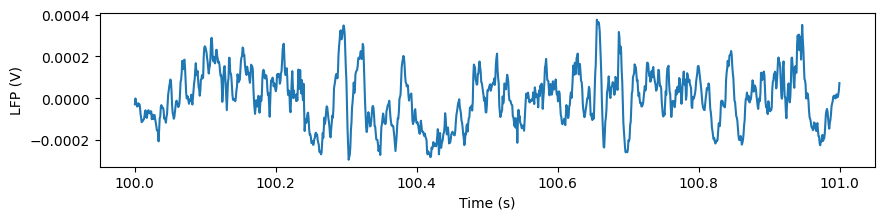

In [21]:
# plot LFP slice btwn 100 and 101 seconds
plt.figure(figsize=(10,2))
_ = plt.plot(lfp_slice.time, lfp_slice.sel(channel=lfp_slice.channel[10]))
plt.xlabel('Time (s)')
plt.ylabel('LFP (V)')

Text(0, 0.5, 'LFP(V)')

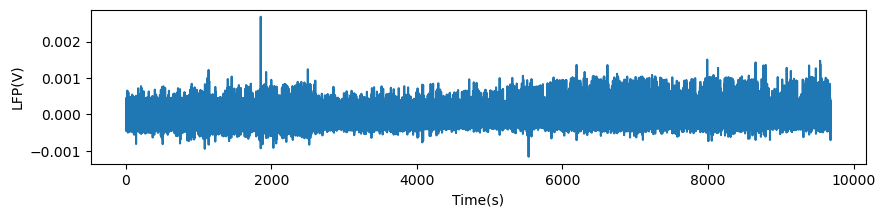

In [22]:
# plot LFP
plt.figure(figsize=(10,2))
pl = plt.plot(lfp.time, lfp.sel(channel=lfp_slice.channel[10]))
plt.xlabel('Time(s)')
plt.ylabel('LFP(V)')

In [23]:
attributes = dir(session)

speed_attributes = [attr for attr in attributes if 'speed' in attr]
print(speed_attributes)

['running_speed']


In [25]:
# download running speed data for the session
running_speed = session.running_speed
running_outfile = f"/Users/hannahghaffari/Documents/Mehta_lab/ecephys_cache_dir/session_{session_id}/running_speed_data.csv"
running_speed.to_csv(running_outfile, index=False)